In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
X = pd.read_csv('/home/qjerryk/Downloads/stat_files/train_data.csv')
y = pd.read_csv('/home/qjerryk/Downloads/stat_files/train_target.csv')
y.drop(columns=['index'], inplace=True)
#display(y.head())
X = X.to_numpy()
y = y.to_numpy()
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.15, random_state=42)  

In [2]:
from app.ensembles import RandomForestMSE, GradientBoostingMSE
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [3]:
y = y.ravel()
a = np.array([0]*17280)
(y-a)


array([340.   , 289.   , 755.   , ..., 235.   , 217.625, 585.   ])

In [4]:
X.shape, y.shape

((17280, 20), (17280,))

In [5]:
regr_1 = RandomForestMSE(max_depth=3, n_estimators=6)
#regr_2 = RandomForestRegressor(max_depth=5, n_estimators=25, criterion='squared_error')
regr_3 = GradientBoostingMSE(n_estimators=2)

"""regr_2.fit(X, y)
print(regr_2.predict(X).shape)
regr_3.fit(X, y)"""
regr_3.fit(X_train, y_train)#, X_val, y_val)
#regr_2.fit(X_train, y_train)
#a, b = regr_3.fit(X_train, y_train, X_val, y_val)



(14688, 1)
(14688,)
zero
1.5
0 (14688,)
first
second
third
zero
1.5
(14688,) (14688,)
first
second
third


(<app.ensembles.ensembles.GradientBoostingMSE at 0x7fa01c20a0b0>,
 {'train_mses': [63129.49686313547, 60586.85625469522], 'test_mses': []})

In [8]:

y_1 = regr_1.predict(X_val)
y_2 = regr_2.predict(X_val)
y_3 = regr_3.predict(X_val)

<Axes: >

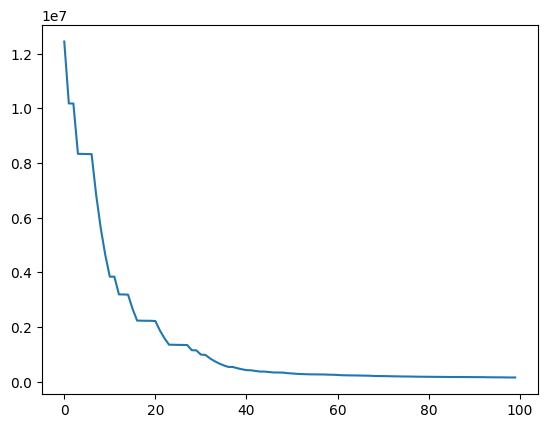

In [8]:
import seaborn as sns
sns.lineplot(x=range(100), y=b['test_mses'])

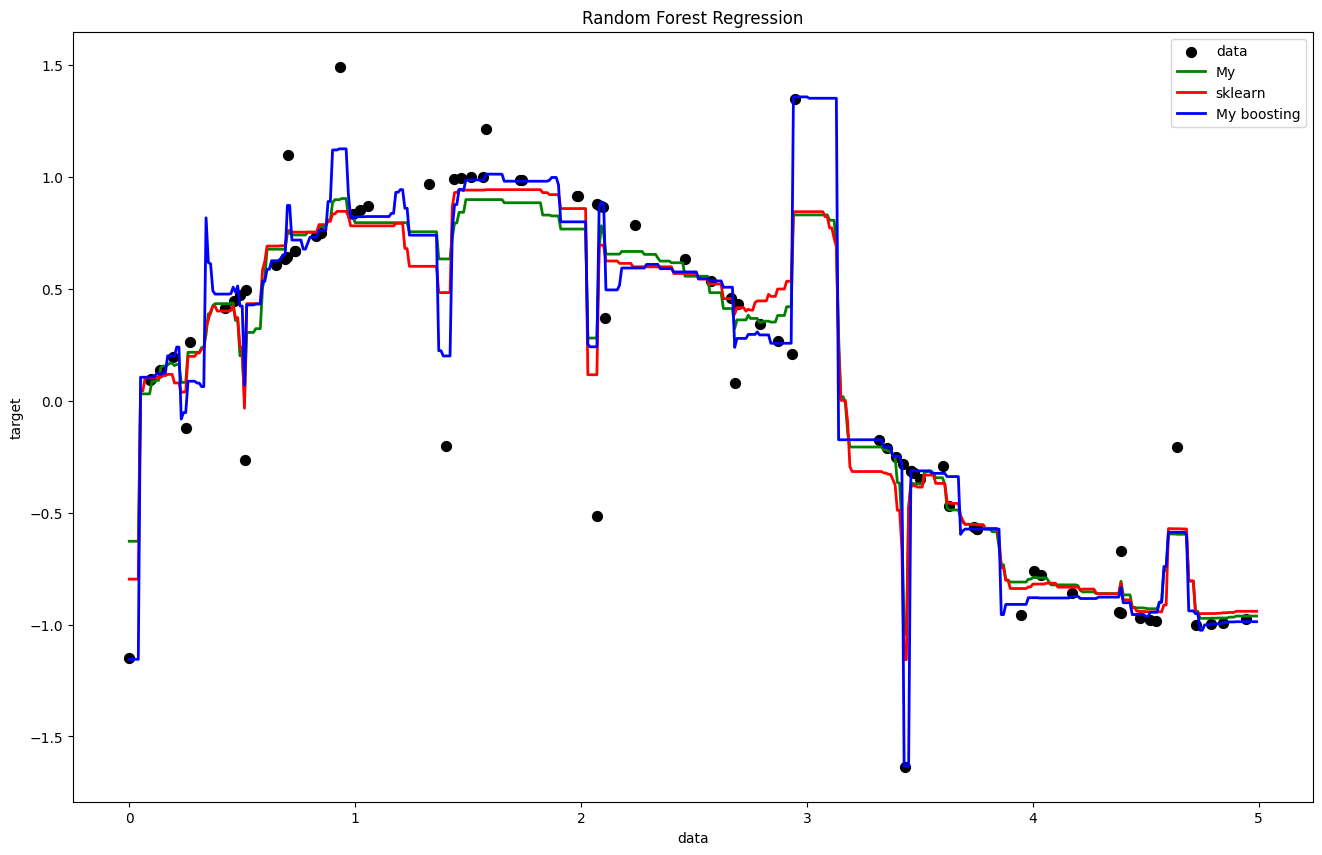

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))

plt.scatter(X, y, s=50, color="black", label="data")
plt.plot(X_test, y_1, color="green", label="My", linewidth=2)
plt.plot(X_test, y_2, color="red", label="sklearn", linewidth=2)
plt.plot(X_test, y_3, color='blue', label="My boosting", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Random Forest Regression")
plt.legend()
plt.show()